# Naming our baby... with science!

This year, I helped [Kat Albrecht](https://katalbrecht.org/about/) and [Joshua Becker](http://www.joshua-becker.com/) to organize the Chicago chapter of the [Summer Institute in Computational Social Science](https://compsocialscience.github.io/summer-institute/2018/chicago/). It has been super great, and we've learned about lots of great computational techniques and research. The only tiny complication of signing up to help organize was knowing that our fourth child was due to be born right in the middle of the institute.

Well, he was born, and as was the case with our other three children, we had a really difficult time choosing a name for him. However, one of our participants--[Sarah Otner](http://www.imperial.ac.uk/people/s.otner)--suggested that we solve our problem with one of the tools that we had learned about during the institute: [Wiki surveys](http://allourideas.org/).

Wiki surveys are an approach to surveys [pioneered by Matt Salganik and Karen Levy](https://doi.org/10.1371/journal.pone.0123483). The basic idea is that respondents can make unlimited pairwise comparisons between options and can add their own options.

So, I set up [a wiki survey](http://allourideas.org/footebaby/), seeded it with a few of the names we were considering, and opened it up to the SICSS participants.

Over the next few days, while my wife recovered in the hospital, SICCS participants submitted and voted and discussed. Now the data is in, the baby is named, and I can go through our decision-making process.

## Analysis

First, we load the libraries we need. This includes the [Urban Institute theme](http://urbaninstitute.github.io/urban_R_theme/) that Alex Engler [told us about](https://youtu.be/BhQqkrZ0_xk).

In [ ]:
library(dplyr)
library(ggplot2)
source('https://raw.githubusercontent.com/UrbanInstitute/urban_R_theme/master/urban_theme.R')
library(extrafont)

I downloaded the raw data files. Votes is the raw votes, and ideas organizes the votes by idea.

In [2]:
votes = read.csv('./files/wikisurvey_votes.csv')
ideas = read.csv('./files/wikisurvey_ideas.csv')

### Voting patterns

Let's look at how many people voted. Because people can vote without an account, this isn't possible to do exactly, but we can look at the number of sessions, which is an upper bound on the number of people who voted.

In [3]:
cat('Number of sessions:',length(unique(votes$Session.ID)),
    '\nNumber of votes:', nrow(votes))

Number of sessions: 125 
Number of votes: 3588

Wow - almost 3600 votes in over 100 sessions. People must have finished their group exercises early that day. ;)

As is common in these sorts of systems, the distribution of votes per session follows a highly skewed distribution.

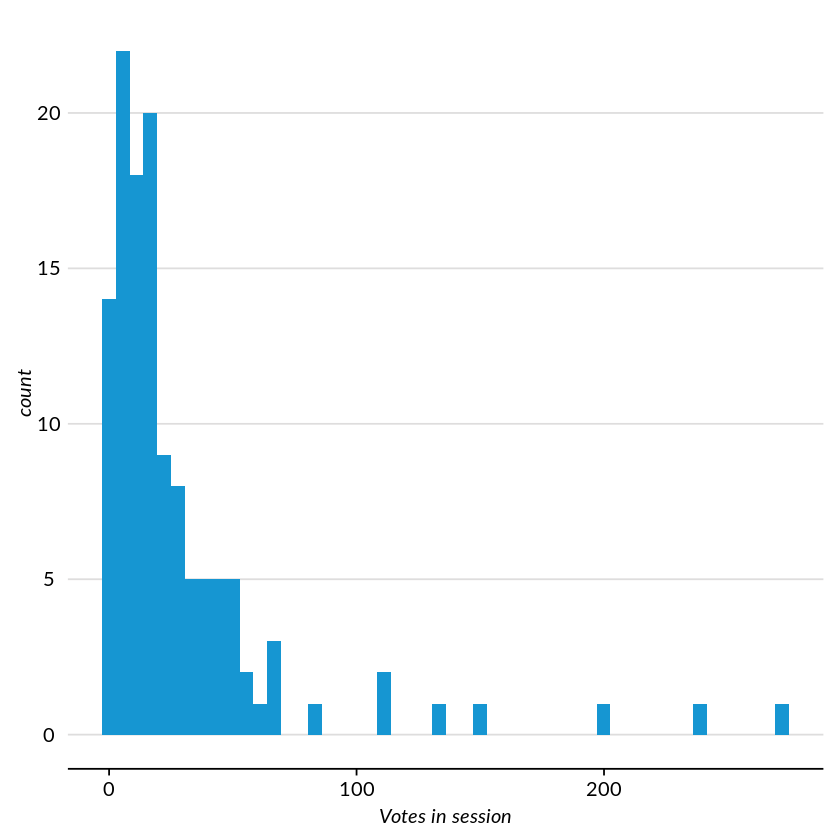

In [12]:
votes %>% 
    group_by(Session.ID) %>%  # Group the votes by session
    tally() %>% # Count how many votes there are per session
ggplot() +
    geom_histogram(aes(x = n), bins = 50) +
    xlab('Votes in session')

### Analyzing names

So, how do the names stack up? The main idea of Salganik and Klein's approach is estimating an opinion matrix, $\Theta$, and estimating the probability that each idea will beat a randomly chosen other idea.As far as I can tell, this is the approach used on the site and the source of the scores. 

Wiki surveys are much more resilient to pranks and "social hacking", because in contrast to typical online polls, people can only make randomized pairwise comparisons (rather than stuffing the ballot for a single option). However, with a sufficiently determined crowd, there are still possibilities for gaming the system.

So, the big question is, did we end up naming our child "[Baby McBabyface](https://www.nytimes.com/2016/03/22/world/europe/boaty-mcboatface-what-you-get-when-you-let-the-internet-decide.html)", as suggested by Morten? ![Baby McBabyface](./files/morten.png)


We start by just looking at the distribution of scores

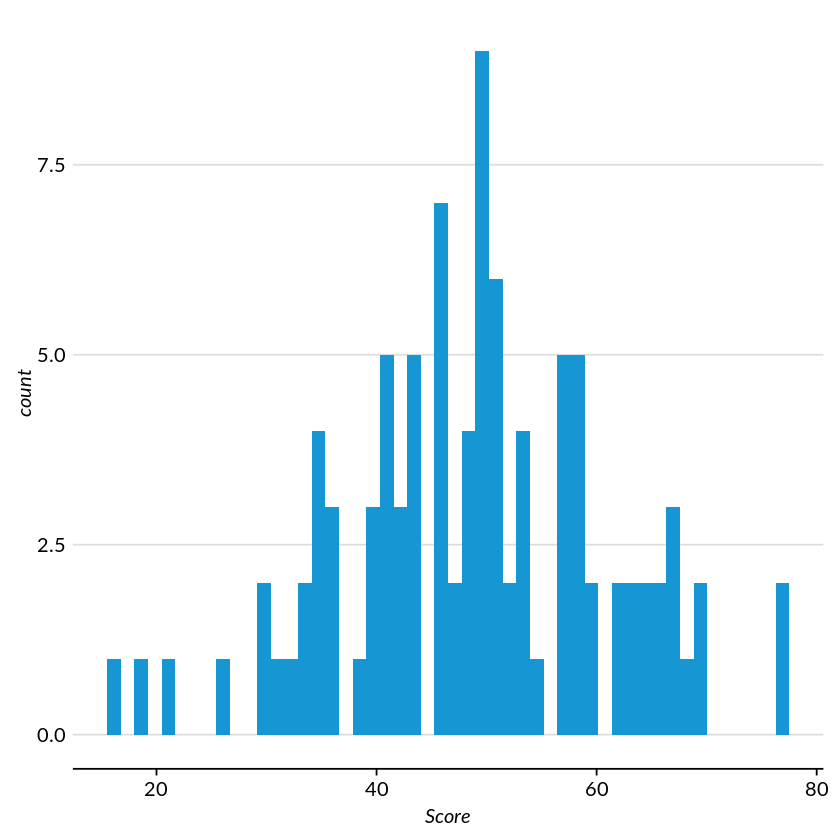

In [13]:
ideas %>% 
group_by(Idea.Text) %>% # There are some duplicates; this combines them
summarise(Score = mean(Score)) %>% # And this averages their score
ggplot(aes(x = Score)) + 
geom_histogram(bins = 50)

It looks like a nice normal distribution, and so looking at the highest values seems reasonable. If we were to just use their scores, what names would we be deciding between?

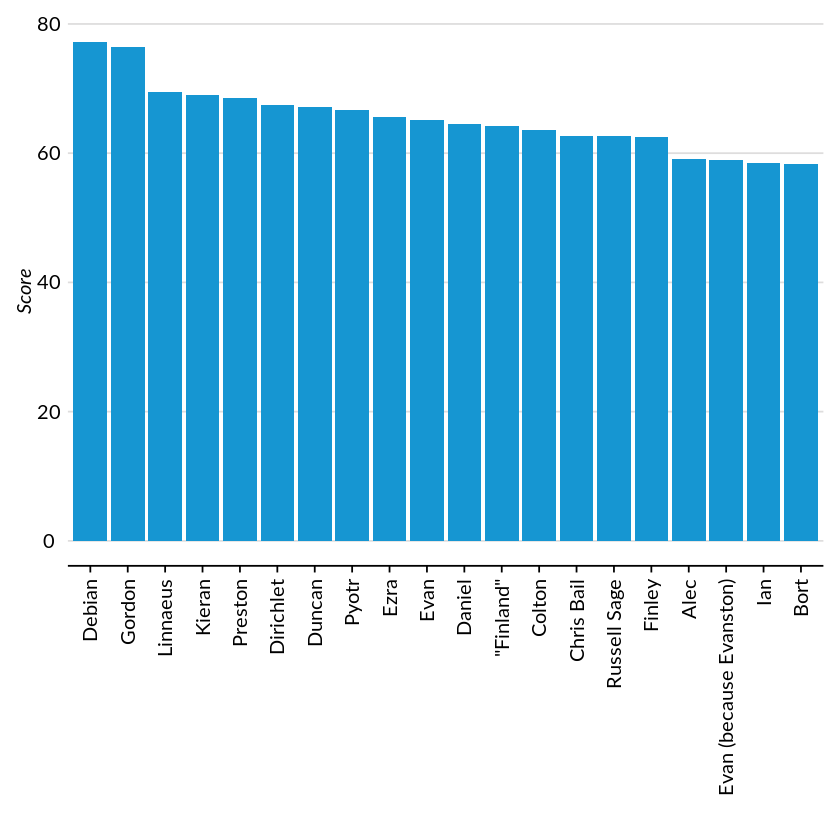

In [14]:
ideas %>% 
group_by(Idea.Text) %>% # Again, we combine exact duplicates
summarise(Score = mean(Score)) %>%
arrange(-Score) %>% # Order by score
head(20) %>% # Just the top 20
ggplot(aes(x = reorder(Idea.Text, -Score), y = Score)) + 
geom_bar(stat = 'identity') + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab('')

Using this approach, the top few names are Debian (which I happen to know was suggested by [Mako](https://mako.cc)), Gordon, and Linnaeus. However, there are other approaches that we could take to ordering the names. For example, here's just a naive ordering by the win ratio. This is basically the same, but without the influence of Bayesian priors.

In [8]:
ideas = ideas %>% mutate(win_rate = Wins / (Wins + Losses)) # Create a win_rate variable

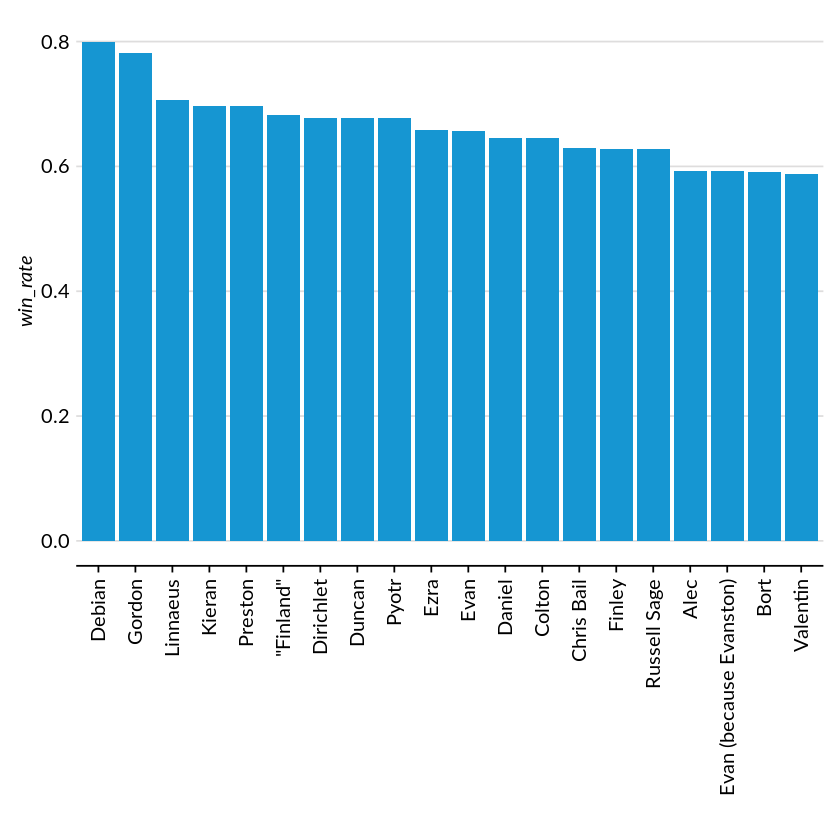

In [9]:
ideas %>% group_by(Idea.Text) %>% # Again, combine the matches
    summarise(win_rate = mean(win_rate)) %>%
    arrange(-win_rate) %>%
    head(20) %>%
ggplot(aes(x = reorder(Idea.Text, -win_rate), y = win_rate)) +
    geom_bar(stat = 'identity') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab('')

Unsurprisingly, the results are similar.

## The Decision

So, what did we do? A more courageous couple would now have a child named Debian Gordon Foote. However, we followed [a](https://www.reuters.com/article/entertainment-us-slovakia-chucknorris-idUSBRE88K0U820120921) [long](http://austinist.com/2013/08/14/two_years_ago_the_city.php) [tradition](https://www.huffingtonpost.com/2012/08/13/4chan-mountain-dew_n_1773076.html) of ignoring the voice of the people, and we named him Andrew David Foote (neither name even appears in the poll!).

Many thanks to all those who participated in our little experiment! It was a lot of fun, and provided lots of inspiration. We were actually very close to naming him Evan, thanks to the poll respondents.

Whether Debian or Dirichlet or "Finland" or Andrew, you have to admit he turned out pretty cute.
![Baby McBabyface in the flesh](./files/andrew.jpg)